In [68]:
import pandas as pd
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
import dtreeviz
pd.set_option('display.max_columns', None)

# Upload csv file : file is copied from "C:\repos\immo-eliza-team6-analysis\analysis\Team_6_Step_3b_outliers_cat.ipynb"
# after running "analysis\Team_6_Step_3b_outliers_cat.ipynb" without the coding blocks for 
# "Encoding - label encoding" on kitchen type, state of building and EPC 
# (hence, missing values on categorical values was treated)
data = r'raw.csv' 
df = pd.read_csv(data, sep = ',')

In [69]:
### HANDLING CATEGORICAL DATA ###

#Label encoding for EPC from A to F replaced by from 1 to 6
order = ['A', 'B', 'C', 'D', 'E', 'F']
category_mapping = {category: rank for rank, category in enumerate(order, start=1)}
df['EPC_encoded'] = df['epc'].map(category_mapping)
df=df.drop(['epc'],axis = 1)

#One hot encoding for kitchen type
dummies = pd.get_dummies(df['Kitchen_type'], prefix='Kitchen')
df=pd.concat([df, dummies], axis = 1)
df=df.drop(['Kitchen_type','Kitchen_Not installed'],axis = 1)

#One hot encoding for province (when no province as True => Brussels)
dummies = pd.get_dummies(df['Province'])
df=pd.concat([df, dummies], axis = 1)
df=df.drop(['Province','Brussels'],axis = 1)

#One hot encoding for State of building (when no state as True => As_new)
dummies = pd.get_dummies(df['State_of_building'], prefix="State")
df=pd.concat([df, dummies], axis = 1)
df=df.drop(['State_of_building','State_As new'],axis = 1)
display(df)

,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Number_of_facades,Furnished,landSurface,price_per_sqm,price_per_sqm_land,Assigned_City,Has_Assigned_City,Assigned_City_5,Has_Assigned_City_5,Assigned_City_10,Has_Assigned_City_10,Assigned_City_15,Has_Assigned_City_15,EPC_encoded,Kitchen_Hyper equipped,Kitchen_Installed,Kitchen_Semi equipped,Antwerp,Brabant_Wallon,East Flanders,Flemish Brabant,Hainaut,Limburg,Liège,Luxembourg,Namur,West Flanders,State_Good,State_Just renovated,State_To be done up,State_To renovate
0,20252354,Ronse,9600,319000,House,3,125,Rotterij,148,50.744176,3.625722,False,False,True,23,370,4,False,767,2552.000000,415.906128,NaN,False,NaN,False,NaN,False,NaN,False,6,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
1,20251003,Geraardsbergen,9500,299999,House,3,167,Pirrestraat,17,50.752121,3.925495,False,False,True,23,895,2,False,1050,1796.401198,285.713333,NaN,False,NaN,False,NaN,False,Aalst,True,4,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
2,20252002,Mechelen,2800,275000,House,3,154,Caputsteenstraat,150,51.033269,4.491795,False,False,True,10,20,2,False,120,1785.714286,2291.666667,NaN,False,NaN,False,NaN,False,Brussels,True,5,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,20252352,Gooik,1755,295000,House,3,172,Strijlandstraat,45,50.791877,4.084293,False,False,True,23,300,3,False,309,1715.116279,954.692557,NaN,False,NaN,False,NaN,False,Aalst,True,6,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
4,20251715,Dilbeek,1700,715000,House,3,280,Herdebeekstraat 94-94A,0,50.840610,4.228425,False,True,True,36,374,3,False,374,2553.571429,1911.764706,NaN,False,NaN,False,Brussels,True,Brussels,True,3,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,20194622,Nivelles,1400,295000,House,4,135,Rue François Lebon,25,50.600371,4.332420,False,False,True,26,220,2,False,120,2185.185185,2458.333333,NaN,False,NaN,False,NaN,False,Brussels,True,4,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
4176,20157543,Tielt,8700,295000,House,4,169,Blauwvoetstraat,5,50.982288,3.329582,False,False,True,23,220,3,False,412,1745.562130,716.019417,NaN,False,NaN,False,NaN,False,Bruges,True,5,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
4177,20140297,Vilvoorde,1800,299000,House,3,237,Marius Duchéstraat,169,50.934037,4.418561,False,False,True,18,220,3,False,197,1261.603376,1517.766497,NaN,False,NaN,False,Brussels,True,Brussels,True,6,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False
4178,20125321,"Saint-Hubert, Mirwart",6870,299000,House,4,215,Rue Du Staplisse,4,50.056322,5.266147,False,False,True,23,220,3,False,386,1390.697674,774.611399,NaN,False,NaN,False,NaN,False,NaN,False,3,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False


In [70]:
### dropping columns not to be considered in model < df2 ###
#print(df['Number_of_facades'].value_counts())
df2 = df.drop(['locality_name', 'Postal_code','street', 'number', 'Subtype','latitude','longitude','hasTerrace','terraceSurface', 'gardenSurface', 'Furnished','price_per_sqm',
       'price_per_sqm_land', 'Assigned_City','Assigned_City_5', 'Has_Assigned_City_5', 'Assigned_City_10','Has_Assigned_City_10', 'Assigned_City_15', 'Has_Assigned_City_15'],axis=1)

print("Remaining dataframe (df2) :")
df2.info()
print("shape of df2:",df2.shape)
print("type of df2:", type(df2))


Remaining dataframe (df2) :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   id                      4180 non-null   int64
 1   Price                   4180 non-null   int64
 2   Number_of_bedrooms      4180 non-null   int64
 3   Living_area             4180 non-null   int64
 4   Open_fire               4180 non-null   bool 
 5   Swimming_Pool           4180 non-null   bool 
 6   Number_of_facades       4180 non-null   int64
 7   landSurface             4180 non-null   int64
 8   Has_Assigned_City       4180 non-null   bool 
 9   EPC_encoded             4180 non-null   int64
 10  Kitchen_Hyper equipped  4180 non-null   bool 
 11  Kitchen_Installed       4180 non-null   bool 
 12  Kitchen_Semi equipped   4180 non-null   bool 
 13  Antwerp                 4180 non-null   bool 
 14  Brabant_Wallon          4180 non-null   bool

In [71]:
### splitting in input and output : X and y ###
X = df2.drop(['id', 'Price'], axis=1)
y = df2["Price"]
print("data type of X and y:",type(X), type(y))
all = X.columns 
print("columns in X", all)

data type of X and y: <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
columns in X Index(['Number_of_bedrooms', 'Living_area', 'Open_fire', 'Swimming_Pool',
       'Number_of_facades', 'landSurface', 'Has_Assigned_City', 'EPC_encoded',
       'Kitchen_Hyper equipped', 'Kitchen_Installed', 'Kitchen_Semi equipped',
       'Antwerp', 'Brabant_Wallon', 'East Flanders', 'Flemish Brabant',
       'Hainaut', 'Limburg', 'Liège', 'Luxembourg', 'Namur', 'West Flanders',
       'State_Good', 'State_Just renovated', 'State_To be done up',
       'State_To renovate'],
      dtype='object')


In [72]:
### splitting in training and testing data ###
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41)
print("shape of X_train and X_test:" , X_train.shape, X_test.shape)

shape of X_train and X_test: (3135, 25) (1045, 25)


In [73]:
### standardize integer-columns except price(ouput to be forecasted) ###
standard_scaler = StandardScaler()
columns = ['Number_of_bedrooms', 'Living_area','landSurface','EPC_encoded', 'Number_of_facades']
X_train_st = X_train.copy()
X_test_st = X_test.copy()
X_train_st[columns] = standard_scaler.fit_transform(X_train[columns])
X_test_st[columns]= standard_scaler.transform(X_test[columns])

In [74]:
### train linear regression model and show score ### 
reg = DecisionTreeRegressor(random_state=0, max_depth=5)
reg.fit(X_train_st, y_train)
reg.score(X_train_st, y_train)

0.5034867811276885

In [75]:
### test the model ### 
y_pred = reg.predict(X_test_st)
reg.score(X_test_st,y_test)

0.4253899601540362

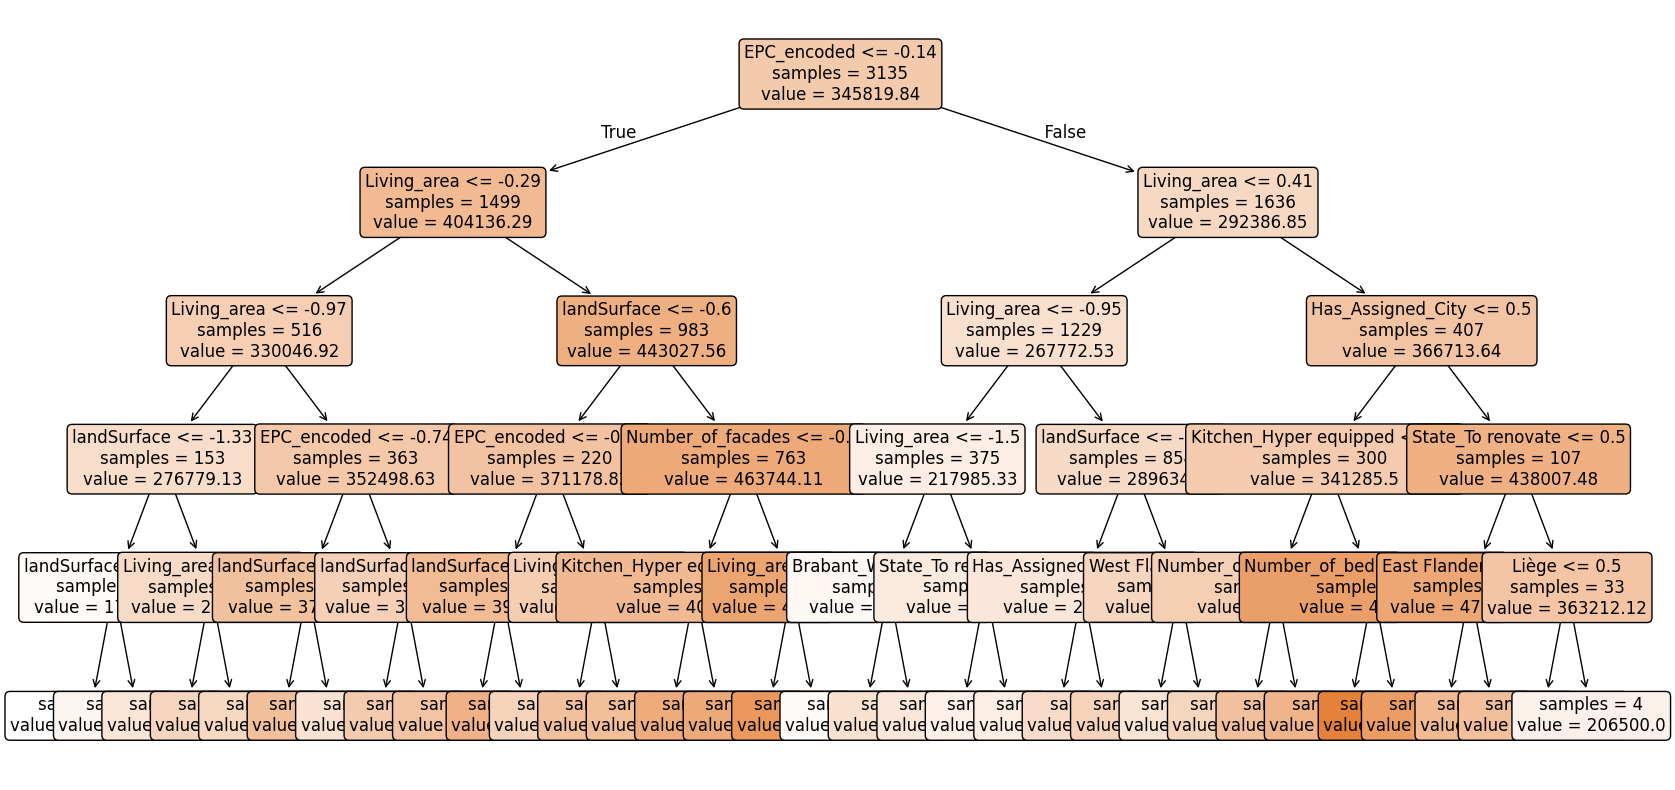

In [76]:
# Visualize the decision tree with sklearn
plt.figure(figsize=(20, 10))
tree.plot_tree(reg, feature_names=X.columns, filled=True,
               impurity=False, rounded=True, precision=2, fontsize=12)
 
plt.show()

c:\repos\immo-eliza-ml\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


IndexError: arrays used as indices must be of integer (or boolean) type

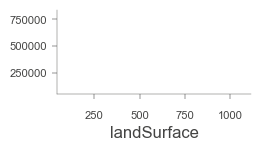

In [82]:
# Visualize the decision tree using dtreeviz
viz = dtreeviz.model(reg, X_train, y_train,
               target_name='SalePrice', feature_names=X_train.columns.tolist())
 
# In Jupyter Notebook, you can directly view the visual using the below:
# viz.view()  # Renders and displays the SVG visualization
 
# In PyCharm, you can render and display the SVG image:
v = viz.view()     # render as SVG into internal object
v.show()           # pop up window

In [ ]:
### interpretation ### 
print("'base'-price :", reg.intercept_)
print('Standard house in trainingset:' )
X_train.mean()

AttributeError: 'DecisionTreeRegressor' object has no attribute 'intercept_'

In [ ]:
print("Contributions to the price prediction :")
"coeff :", list(zip(all, reg.coef_))

Contributions to the price prediction :


('coeff :',
 [('Number_of_bedrooms', np.float64(7829.142823314975)),
  ('Living_area', np.float64(32461.150327252064)),
  ('Open_fire', np.float64(16019.141253399363)),
  ('Swimming_Pool', np.float64(47225.9314999087)),
  ('Number_of_facades', np.float64(20509.711576813377)),
  ('landSurface', np.float64(28140.054860397122)),
  ('Has_Assigned_City', np.float64(34508.41032465224)),
  ('EPC_encoded', np.float64(-45434.58895994952)),
  ('Kitchen_Hyper equipped', np.float64(26623.622177072575)),
  ('Kitchen_Installed', np.float64(5162.467280839624)),
  ('Kitchen_Semi equipped', np.float64(-5684.744323252399)),
  ('Antwerp', np.float64(-168149.2151984376)),
  ('Brabant_Wallon', np.float64(-142159.07442676247)),
  ('East Flanders', np.float64(-216437.98550914117)),
  ('Flemish Brabant', np.float64(-164343.39681553075)),
  ('Hainaut', np.float64(-289365.27801041387)),
  ('Limburg', np.float64(-239648.9094627437)),
  ('Liège', np.float64(-269102.78583501256)),
  ('Luxembourg', np.float64(-2595